<h2> Universidad Nacional de La Plata </h2>
<h2> Método de $Steepest \  descent$ para el cálculo de la inversión gravimétrica</h2>
<h4>Autores:</h4>Cartagena, Tomás; Ramírez, Stephany y Rangel, Orianna

Julio de 2020

<h2>Lectura de las observaciones gravimétricas</h2>


Leemos el archivo "grav-cilindro2D-invertir.txt" con las posiciones "x" observadas y las anomalías sintéticas
obtenidas en cada caso:


In [5]:
#Importamos los módulos necesarios para esta notebook
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')       #Este comando sirve para que no se muestren las ventanas de advertencias
from scipy.interpolate import griddata
from numpy import linalg as LA
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D 

#Leemos el dato
data= np.loadtxt("http://carina.fcaglp.unlp.edu.ar/~jgomez/academic/mpp/data/grav-cilindro2D-invertir.txt")

X,g= data[:,0],data[:,1]  # columnas del dato en cada vector

<h2>Visualización del dato observado</h2>


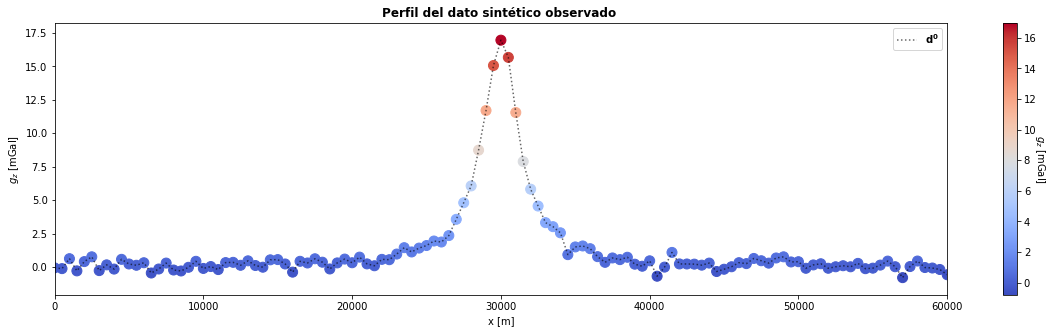

In [6]:
legend_properties = {'weight':'bold'} 
plt.figure(1,figsize=(20,5))
plt.plot(X,g,color="k",ls=":",alpha=0.6,label="$\mathbf{d^0}$")
plt.scatter(X,g,s=100,c=g,cmap="coolwarm",linewidth=1,marker="o")
plt.colorbar(orientation='vertical',shrink=1).set_label("$g_z$ [mGal]", labelpad=10, y=0.5, rotation=270)
plt.xlabel('x [m]')
plt.xlim([0, X.max()+10])
plt.ylabel('$g_z$ [mGal]')
plt.title('Perfil del dato sintético observado ',fontweight='bold')
plt.legend(prop=legend_properties)
plt.show()

<div align="justify">
<br>Podemos distinguir el efecto de una anomalía gravimétrica y que el dato contiene ruido. Analizando la forma de la anomalía, diremos que es producto del efecto de un cilindro horizontal homogéneo con una densidad mayor que el entorno. Usaremos el siguente modelo:</br>
<br>
\begin{align}
f(x;Δσ,R,x_0,z_0)≡g_z(x;Δσ,R,x_0,z_0)=2πGΔσR^2\dfrac{z_0}{(x−x_0)^2+z_0^2}\,\,
\end{align}
</br>
<br> Donde  $\Delta \sigma$ es el contraste de densidad del cuerpo con el entorno, $R$ ,$x_0$ y $z_0$ representan el radio y las coordenadas del eje del cilindro.</br>
</div> 

 
<h2>Descripción teórica del método </h2>



<div align="justify">
<br>Utilizaremos el método "$Steepest \  descent$", el cual consiste en determinar los parámetros del modelo "$\mathbf{m}$" por medio de un algoritmo iterativo. Para esto planteamos un modelo inicial "$\mathbf{m_0}$" que iremos perturbando con un cierto $ \Delta \mathbf{m}$ de manera que con cada iteración, el error entre lo medido y lo calculado sea mínimo, esto significa que nos movemos en el sentido opuesto del gradiente de la función a minimizar, también llamada función de costo $q$. La expresión del gradiente de la misma, viene dada por:    </br>
    


<br>\begin{align}
 ∇q(\mathbf{m})=−\mathbf{e\dfrac{∂f(m)}{∂m}}=−A^T\mathbf{e}
\end{align}
</br>

<br>Donde $e$ es el vector de errores, calculado como la diferencia entre el modelo inicial (datos medidos) ($\mathbf{d^o}$) y el modelo calculado con el algoritmo ($\mathbf{d^c}$ ). </br>

<br>
\begin{align}
\mathbf{e(m)}=\mathbf{d^o}−\mathbf{d^c}\,\,
\end{align}
</br>

<br> Un problema que podría presentar el método surge por el hecho de que la función de costo puede tener más de un mínimo, de modo que al buscar un mínimo global, si nuestros parámetros iniciales están muy cercanos a un mínimo local, el método nos arrojará un resultado que no sería la mejor optimización.</br>

 <br>Por otro lado, como ventaja tenemos un método de buena convergencia y fácil de programar. </br>
 
 <br> Es importante acotar que la intención del método es obtener los parámetros más próximos a los verdaderos y que definen de mejor manera el comportamiento de la anomalía. Estos parámetros los denotaremos de la siguiente manera: $\mathbf{m^*} =[\Delta\sigma ^* , R^*, x_0^* ,z_0^*] $.</br></div> 
 


<div align="justify">
<h2>Desarrollo del algoritmo de minimización</h2>


<br>Fijamos los parámetros iniciales ( $\mathbf{m_0}$ ), llevamos las constantes físicas al S.I. y generamos los arreglos de los datos.</br>    
</div> 

In [7]:
#Paramámetros iniciales: sigma[kg m-3],R[m],X0[m],Z0[m] 
m0=np.array([100,500 ,28000,500])

#Definición de parámentros (SI)
X= np.asarray(X) 
g=np.asarray(g)
G=6.674e-11 #N m2 Kg-2 
g=g*1E-5   #llevo mGal -> m s-2
x=len(X)

M= len(m0)
N=len(g)

<div align="justify">
<br> Definiremos la función a minimizar o función de costo "$q$", cuya expresión viene dada de la siguiente forma: </br>


<br>\begin{align}
q(\Delta\sigma,R,x_0,z_0)=q(\mathbf{m}):=\dfrac{1}{2}||\mathbf{d^o}−\mathbf{d^c}||^2=\dfrac{1}{2}||\mathbf{d^o}−\mathbf{f(m)}||^2=\dfrac{1}{2} ||\mathbf{e}||^2  \,\,
\end{align}</br>


<br> Hacemos la diferencia entre los parámetros observados y los calculados como en la ecuación del vector de errores, donde $\mathbf{d^c}$ se calculó cuatro veces (una por cada elemento del  modelo) fijando tres de los parámetros y haciendo variar uno de ellos dentro de un rango de valores coherentes con el caso de estudio. </br>

<h4> Rangos utilizados para variar cada uno de los parámetros y valores fijos establecidos:</h4>

</body>
<table BORDER="3"    WIDTH="50%"   CELLPADDING="2" CELLSPACING="1">
         <tr>
            <th style="text-align:center">Parámetro</th>
            <th style="text-align:center">Rango de valores utilizados</th>
            <th style="text-align:center">Parámetro</th>
            <th style="text-align:center">Valor Fijo</th>
         </tr>
         <tr>
            <td style="text-align:center">$\Delta\sigma$</td>
            <td style="text-align:center">$[0,1200] [kg/m^3]$</td>
            <td style="text-align:center">$\Delta\sigma_{fijo}$</td>
            <td style="text-align:center">$600 [kg/m^3]$</td>
         </tr>
         <tr>
            <td style="text-align:center">$R$</td>
            <td style="text-align:center">$[0,2000] [m]$</td>
            <td style="text-align:center">$R_{fijo}$</td>
            <td style="text-align:center">$1000[m]$</td>
         </tr>
         <tr>
            <td style="text-align:center">$x_0$</td>
            <td style="text-align:center">$[0,60000]  [m]$</td>
            <td style="text-align:center">$x_{0\ fijo}$</td>
            <td style="text-align:center">$30000[m]$</td>
         </tr>
         <tr>
            <td style="text-align:center">$z_0$</td>
            <td style="text-align:center">$[0,3000] [m]$</td>
            <td style="text-align:center">$z_{0\ fijo}$</td>
            <td style="text-align:center">$1500 [m]$</td>
         </tr>
</table>
</body>

</div>

<h2>Gráficos de la función objetivo variando uno y dos parámetros <h2> 

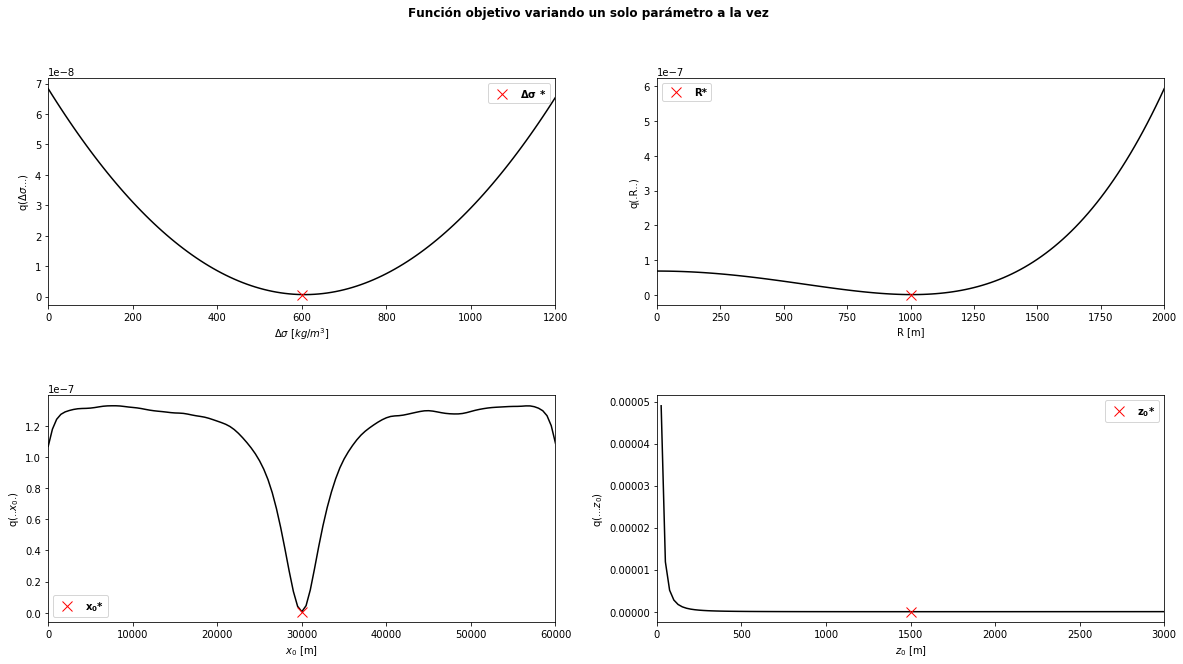

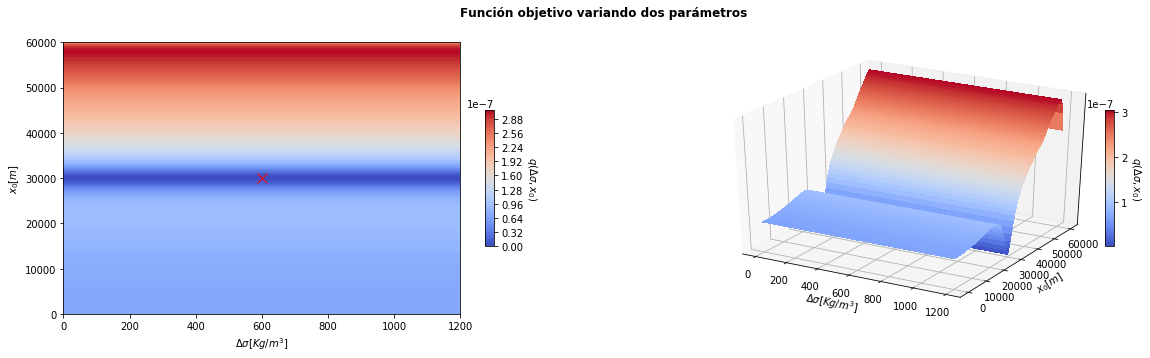

In [8]:
#Generaremos una función que sirva para calcular los valores de la función de costo para el vector de parámetros fijos
#y para los rangos de valores coherentes indicados arriba:

def calc_q(m,sigma,R,x0,z0,X):
    g_z1,g_z2,g_z3,g_z4,g_z5=np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)
#Calcularemos las anomalías dejando fijos tres parámetros y variando uno solo, las anomalías las calcularemos en
#m s-2
    q1,q2,q3,q4,q5=np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)
    dif1,dif2,dif3,dif4,dif5=np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)
  
    for u in range(N):
        for i in range(N):
              g_z1[i]= 2* np.pi *G* sigma[u]* m_fijo[1]**2 * m_fijo[3]/ ((X[i]-m_fijo[2])**2 + m_fijo[3]**2)#Variando Sigma
              g_z2[i]= 2* np.pi *G* m_fijo[0]* R[u]**2 * m_fijo[3]/ ((X[i]-m_fijo[2])**2 + m_fijo[3]**2)  #variando R
              g_z3[i]= 2* np.pi *G* m_fijo[0]* m_fijo[1]**2 * m_fijo[3]/ ((X[i]-x0[u])**2 + m_fijo[3]**2) #variando x0
              g_z4[i]= 2* np.pi *G* m_fijo[0]* m_fijo[1]**2 * z0[u]/ ((X[i]-m_fijo[2])**2 + z0[u]**2)     #variando z0
              g_z5[i]= 2* np.pi *G* sigma[u]* m_fijo[1]**2 * m_fijo[3]/ ((X[i]-x0[u])**2 + m_fijo[3]**2)  #Variando Sigma y x0

        dif1=g-g_z1
        q1[u]=0.5*LA.norm(dif1)**2

        dif2=g-g_z2
        q2[u]=0.5*LA.norm(dif2)**2

        dif3=g-g_z3
        q3[u]=0.5*LA.norm(dif3)**2

        dif4=g-g_z4
        q4[u]=0.5*LA.norm(dif4)**2
    
        dif5=g-g_z5
        q5[u]=0.5*LA.norm(dif5)**2

        if sigma[u]==600:
            qq1=q1[u]
        if R[u]==1000.0000000000001:
            qq2=q2[u]
        if x0[u]==30000:
            qq3=q3[u]
        if z0[u]==1500:
            qq4=q4[u]

    xl=['$\Delta\sigma$ $[kg/m^3]$','R [m]','$x_0$ [m]','$z_0$ [m]']
    yl=[r'q($\Delta\sigma$...)','q(.R..)','q(..$x_0$.)','q(...$z_0$)']
    daty=[q1,q2,q3,q4]
    datx=[sigma,R,x0,z0]
    cruz_x=[600,1000,30000,1500]
    cruz_y=[qq1,qq2,qq3,qq4]
    label=[r"$\mathbf{\Delta \sigma}$ *","R*","$\mathbf{x_0}$*","$\mathbf{z_0}$*"] 
    legend_properties = {'weight':'bold'}

    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    fig.subplots_adjust(hspace=0.4, wspace=0.2)

    for ax,xl,yl,datx,daty,cruz_x,cruz_y,label in zip(axes.flat,xl,yl,datx,daty,cruz_x,cruz_y,label):
        ax.plot(datx,daty,'k-')
        ax.plot(cruz_x,cruz_y,'r.',label=label,marker="x",markersize=10)
        ax.set_xlabel(xl)
        ax.set_ylabel(yl)
        ax.set_xlim([datx.min(), datx.max()])
        ax.legend(prop=legend_properties)
        fig.suptitle('Función objetivo variando un solo parámetro a la vez',fontweight='bold')
    plt.show()
    
    ############################# GRÁFICO 2D (variando 2 parámetros) y 3D #############################

    #Generamos la grilla
    zi = griddata((sigma, x0), q5, (sigma[None,:], x0[:,None]), method='nearest')
    SIGMA, X0 = np.meshgrid(sigma, x0)
    sigma_0=600
    x0_0=30000
    cruz_y=[qq1,qq2,qq3,qq4]

    fig = plt.figure(figsize=(20,5))

    ax = fig.add_subplot(121)
    surf=ax.contourf(sigma, x0, zi,100, cmap='coolwarm')
    ax.plot(sigma_0,x0_0,'r.',label="x0*",marker="x",markersize=10)
    ax.set_xlabel(r"$\Delta\sigma [Kg/ m^3]$")
    ax.set_ylabel(r"$x_0 [m]$")
    fig.colorbar(surf, shrink=0.5, aspect=15,pad=0.05).set_label(r'$q( \Delta\sigma , x_0 )$',labelpad=16, y=0.5, rotation=270)

    ax = fig.add_subplot(122, projection='3d')
    surf=ax.plot_surface(SIGMA, X0, zi, rstride=1, cstride=1, cmap='coolwarm', linewidth=0, antialiased=False)
    ax.set_xlabel(r'$\Delta\sigma [Kg/ m^3]$')
    ax.set_ylabel(r'$x_0 [m] $')
    ax.set_zticks([])  #Así desactivo los valores del eje z
    fig.colorbar( surf, shrink=0.5, aspect=15,pad=-0.05).set_label(r'$q( \Delta\sigma , x_0 )$',labelpad=16, y=0.5, rotation=270)

    fig.suptitle('Función objetivo variando dos parámetros',fontweight='bold')
    plt.subplots_adjust(hspace=0, wspace=0.25)
    plt.show()
    return 

#Generaremos el intervalo de variación para cada uno de los parámetros:
sigma=np.linspace(0,1200,N)  #Contraste de densidad en [kg m-3]
R=np.linspace(0,2000,N)      #Radio en [m]
x0=np.linspace(0,60000,N)    #Ubicación del eje del cilindro en la dirección "x" en [m]
z0=np.linspace(0,3000,N)     #Profundidad del eje del cilindro en la dirección "z" en [m]

#Mientras que los valores fijos a utilizar cuando no los hacemos variar serán:

#parámetros iniciales: ([sigma[kg/m3], R[m],  X0[m],  Z0[m] ])
m_fijo=([600,1000,30000,1500])

#Llamo a la función, la cual graficará el resultado buscado de una vez:
calc_q=calc_q(m_fijo,sigma,R,x0,z0,X)

<div align="justify">
 <br>Podemos observar que en cada caso, la X mostrada nos indica el valor de cada parámetro para el cual la función de costo es mínima, es decir, esto nos sirve para plantear los parámetros de aproximación inicial del algoritmo.</br>
 
 <br>También notamos que de los cuatro gráficos, la función de costo que pareciera mostrar menos problemas para converger, es en la que varía el contraste de densidad, ya que presenta un único mínimo y es mas suave. Mientras que en los otros casos, puede ocurrir que exista más de un mínimo o que la función varíe de forma pronunciada.</br>

<br> En el último gráfico podemos observar cómo varía la función de costo, cuando hacemos variar dos de los parámetros en lugar de uno solo de ellos, y vemos de igual manera una región (en lugar de un perfil) donde esperaríamos encontrar el mínimo, es decir, se nota que la topografía de la función no es sencilla, lo cual se debe a que estamos trabajando con un caso no lineal, esto a su vez puede explicar por qué otros métodos de minimización no son capaces de encontrar la solución adecuada. </br>
</div> 

<div align="justify">
    
<br><h3> Matriz Jacobiana </h3></br>
    
<br>Procederemos a generar las funciones necesarias para el cálculo de las anomalías sintéticas, así como de la matriz Jacobiana y finalmente el gradiente de la función.</br>

<br>Para el caso de la matriz Jacobiana, hay que tener en cuenta que el número de filas corresponderá al número de datos disponibles y el número de columnas representa el número de parámetros a encontrar, por lo que en este caso particular tendremos una matriz de N filas y 4 columnas, donde N es el número de observaciones. Para su cálculo, utilizaremos las siguientes expresiones de derivadas analíticas:</br>

<br>
\begin{align}
A=[\dfrac{∂}{∂m_1}\mathbf{f(m)} , \dfrac{∂}{∂m_2}\mathbf{f(m)}, \dfrac{∂}{∂m_3}\mathbf{f(m)} , \dfrac{∂}{∂m_4}\mathbf{f(m)}]
\end{align}

\begin{align}
\dfrac{∂}{∂Δσ}f(\mathbf{m})_i=2πGR^2\dfrac{z_0}{(x_i−x_0)^2+z_0^2}
\end{align}

\begin{align}
\dfrac{∂}{∂R}f(\mathbf{m})_i=4πGΔσR\dfrac{z_0}{(x_i−x_0)^2+z_0^2}
\end{align}

\begin{align}
\dfrac{∂}{∂x_0}f(\mathbf{m})_i=4πGΔσR^2\dfrac{(x_i−x_0)z_0}{((x_i−x_0)^2+z_0^2)^2}
\end{align}

\begin{align}
\dfrac{∂}{∂z_0}f(\mathbf{m})_i=2πGΔσR^2\dfrac{(x_i−x_0)^2-z_0^2}{((x_i−x_0)^2+z_0^2)^2}
\end{align}
</br>

<br><h3> Expresión del algoritmo a utilizar </h3></br>

<br>Finalmente, la expresión iterativa del algoritmo calcula el nuevo vector de parámetros, al introducir una perturbación en la iteración anterior, usando la constante $\epsilon$ (considerando $\epsilon > 0$ ), también conocido como parámetro de aprendizaje.</br>

<br> \begin{align}
\mathbf{m_{k+1}}=\mathbf{m_k}−ϵ∇q(\mathbf{m_k})
\end{align} </br>


<h3> ¿Cómo hallar el valor adecuado del escalar $\epsilon$ y qué rangos de valores son esperables?</h3>

<br> El cálculo del valor de aprendizaje $\epsilon$ es empírico, es decir, el mismo se obtiene mediante un método de prueba y error durante el cual esperaremos hallar el valor de $\epsilon$ que arroje el menor valor de la función de costo, esto se puede complementar con una observación en paralelo del ajuste de la curva calculada con la curva correspondiente a las observaciones. </br>

<br> A continuación, mostraremos un ejemplo de cómo se comporta la función de costo al trabajar con un set de valores del parámetro de aprendizaje dentro y fuera del rango óptimo. En este caso el intervalo de $\epsilon$ utilizado oscila entre $10^{-4}$ y $10^{-2}$.</br>

</div>

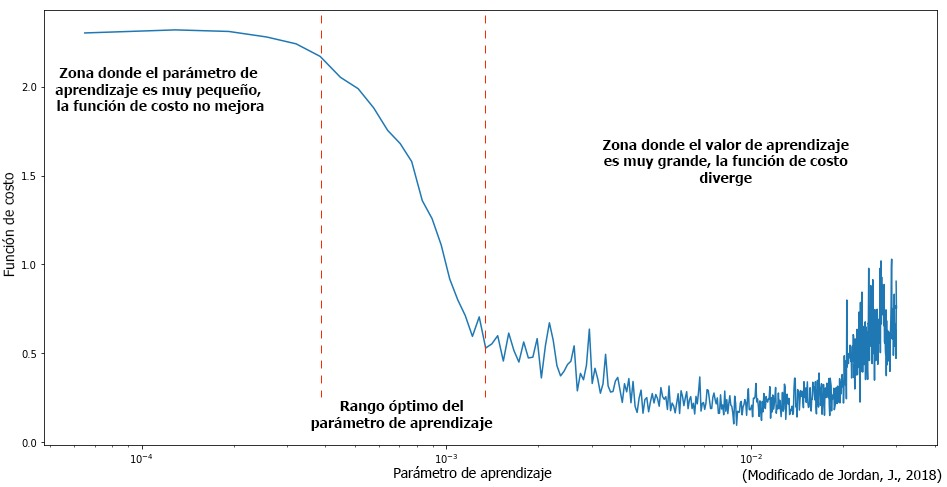

<div align="justify">
    
<br> Observamos que cuando se aplica un parámetro de aprendizaje muy pequeño, la función de costo se minimiza a una tasa muy lenta, por lo que no logra converger al mínimo deseado. Por el contrario, cuando nos excedemos en la selección del valor del parámetro, la función de costo tiende a diverger del mínimo buscado, por lo que será nuestro trabajo hallar el rango óptimo de $\epsilon$ para el cual el comportamiento de la función de costo sea el mostrado, es decir, que decrezca de manera notoria hasta alcanzar el mínimo valor.</br>

<br>Según la tendencia global al trabajar con algoritmos de optimización, un rango de referencia posible del parámetro de aprendizaje es [$10^{-7}$,$1$]. Sin embargo, como se mencionó anteriormente, siempre la selección del mismo va a depender de los parámetros a ajustar y de las unidades en las que se trabaje.</br>

<h2> Ambigüedad del problema inverso </h2>

<br> Sabemos que al trabajar con el método inverso, nos encontraremos con una gran cantidad de resultados que satisfacen el modelo teórico planteado, esto debido a que el mismo depende de la metolodogía aplicada, así como del modelo inicial, es decir, no hay unicidad de la solución, sino que distintas combinaciones de los parámetros de entrada pueden generar una misma salida, de modo que el simple hecho de obtener un modelo final optimizado no asegura que el mismo sea el más adecuado. </br>

<br> De modo que para poder considerar una solución como "buena" esta deberá ser exacta, además de precisa. Para que esto se cumpla, los parámetros ajustados no deberán alejarse de los valores reales más de un porcentaje específico, el cual será definido a criterio del operador en base a la importancia que juegue cada uno de los parámetros en el modelo, es decir, en base a qué tanto alteren la tendencia de la curva que se ajusta al modelo teórico luego de agregarles una cierta perturbación (grande o pequeña) .</br>

<br> Por ende, para cada uno de los parámetros, el error porcentual ($\Delta [\%]$) tolerable en cada caso para considerar al resultado como bueno será: $\Delta(\Delta \sigma) \leq 6\%$,$\Delta R \leq 6\%$,  $\Delta x_0 \leq 1\%$ y   $\Delta z_0 \leq 2\%$.</br></div>


<h2>Aplicación del método a los datos sintéticos<h2> 

In [9]:
def steepest_gradient_cilindro_gravimetrico(  g , X , m0 , eps ,iter , unid ):
    #Selección de las unidades a utilizar
    if unid == " [mGal]":
                G=  6.67408e-11                                  # m3 kg-1 s-2
                G*=1e5                                           #para trabajar en mGal
    else: 
                G=  6.67408e-11                                  # m3 kg-1 s-2
######################################################### FUNCIONES ############################################################

##### MATRIZ  JACOBIANA ###### 

    def jacob(m,M,N,X,G):
        A=np.zeros(shape=(N,M))
        fac=2 * np.pi *G    #Factor constante
        A=np.array([fac * m[1]**2 * m[3] / ( (X-m[2])**2 + m[3]**2 ),
              2* fac * m[0]* m[1] * m[3] / ( (X-m[2])**2 + m[3]**2 ), 
              2* fac * m[0]* m[1]**2 * m[3]*(X-m[2]) / (( (X-m[2])**2 + m[3]**2 )**2),
             fac * m[0]* m[1]**2 * ( (X-m[2])**2 - m[3]**2  ) / (( (X-m[2])**2 + m[3]**2 )**2)]).T
        return A

#### MATRIZ DEL MODELO ######

    def gz_cilindro(X,m,G):
      #Constante de gravitación universal
      ctte= 2 * np.pi * G  
      gz=np.zeros(len(X))
      for i in range (len(X)):
        gz[i]= (ctte* m[0] * (m[1]**2) * m[3] )/ ((X[i] - m[2])**2 + m[3]**2)
      return gz

############### GRADIENTE DE LA FUNCIÓN DE COSTO ##############

    def grad_cost (A,g,m,X):

        dc= gz_cilindro(X,m,G)     #Dato calculado
        d0 = g                   #Dato observado 
        N=len(g)
        e=np.zeros(N)            #Errores
        for i in range (N):
            e[i] = d0[i]-dc[i]
        grad_q= -A.T@e           #Defino grad_q
        return grad_q

################################################################################################################################

#Definiciones de los parámetros 

    N=len(g)    #Número de observaciones
    M=len(m0)   #Número de incógnitas

#Vector q: inicializamos con ceros y de tamaño ITER, ya que lo vamos a ir rellenando con cada iteración en el bucle. 

    q=np.zeros(iter)
  
    rho_k,R_k,x0_k,z0_k=np.zeros(iter),np.zeros(iter),np.zeros(iter),np.zeros(iter) #Inicializo variables

    
    print()
    print("Número de iteraciones:", iter)
    print("Vector de parámetros:")
    print("D_Sigma [kg m-3]","  ","R[m]","  ","X_0 [m] ","  ","Z_0 [m]")
    print("   ","{:.3f}".format(m0[0]),"     ","{:.3f}".format(m0[1])," ","{:.3f}".format(m0[2])," ","{:.3f}".format(m0[3]))
    print()
    
    for i in range(iter):
  
        dc=gz_cilindro(X,m0,G)  #Cálculo de dc 
        d0 = g                  #Defino d0
        e=np.zeros(N)           
        for j in range (N):
            e[j] = d0[j]-dc[j]  #Cálculo del error
      
  #Cálculo del jacobiano y del gradiente
        A = jacob(m0,M,N,X,G)
        grad_q = grad_cost(A,g,m0,X).T
  
  #Calculamos el nuevo vector de parámetros m
        m = m0 - eps*grad_q
    
  #Vamos agregando los valores de cada parámetro para ver cómo varían con cada iteración:
        rho_k[i],R_k[i],x0_k[i],z0_k[i]=m0[0],m0[1],m0[2],m0[3]
    
  #Vuelvo a inicializar el vector de parámetros pero ya dentro del bucle
        m0 = m
        
  #Calculamos q para cada iteración del bucle
        q[i] = (e.T@e)*0.5
    
########################################################GRÁFICOS################################################################  
    dat=[rho_k,R_k,x0_k,z0_k]
    k=np.linspace(1,iter,iter)
    
    minq=np.min(q)  
    maxq=np.max(q)
    q=q/maxq

    fig, axes = plt.subplots(1, 2, figsize=(20,5))

    axes[0].plot(k,q,color="k",ls=":",alpha=0.6,label="$\mathbf{q}$")
    map1=axes[0].scatter(k,q,s=100,c=q,cmap="coolwarm",linewidth=1,marker="o")
    fig.colorbar(map1,ax=axes[0],orientation='vertical',shrink=1).set_label('$\mathbf{q}$', labelpad=5, y=0.5, rotation=270)
    axes[0].set_title("Variación de la función de costo con cada iteración",fontweight='bold',y=1.1)
    axes[0].set_ylabel("q($m_k$)/max(q)")
    axes[0].set_xlabel(" Iteraciones")
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(X,dc,color="k",ls=":",alpha=0.6,label="$\mathbf{d^c}$")
    map2=axes[1].scatter(X,dc,s=100,c=dc,cmap="coolwarm",linewidth=1,marker="o")
    fig.colorbar(map2,ax=axes[1],orientation='vertical',shrink=1, format='%.0e').set_label("$\mathbf{d^c}$"+unid, labelpad=12, y=0.5, rotation=270)
    axes[1].plot(X, d0 ,'k.',label="$\mathbf{d^0}$")
    axes[1].set_title("Comparación entre el modelo observado y el sintético minimizado",fontweight='bold',y=1.1)
    axes[1].set_ylabel("$g_z$"+unid)
    axes[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[1].set_xlabel("X [m]") 
    axes[1].set_xlim([0, X.max()])
    axes[1].legend()
    axes[1].grid()
    plt.show()
    
##################################################################################################################
    title="Variación de cada parámetro con cada iteración"
    names=[r'$\mathbf{\Delta\sigma}$ $\mathbf{[kg/m^3]}$','$\mathbf{R[m]}$','$\mathbf{x_0 [m]}$','$\mathbf{z_0 [m]}$']
    linea_y=np.ones((len(k),M)) * [600,1000,30000,1500] # m00 
    linea_y=linea_y.T
    label=[r"$\mathbf{\Delta \sigma}$ * real","R* real","$\mathbf{x_0}$* real","$\mathbf{z_0}$* real"] 
    legend_properties = {'weight':'bold'} #sirve para colocar el texto que no esté en formato latex en formato "bold"

    fig, axes = plt.subplots(1, 4, figsize=(18,5))

    fig.subplots_adjust(hspace=15, wspace=0.2)
    plt.title(title,loc='center')

    for ax,names,dat,linea_y,label in zip(axes.flat,names,dat,linea_y,label):
        ax.plot(k,dat,'k-')
        ax.plot(linea_y,'b--',label=label)
        ax.set_xlabel("Iteración")
        ax.set_title(names,fontweight='bold')
        ax.legend(prop=legend_properties)
        ax.set_xlim([0, k.max()+k.max()*0.05])
        ax.grid()
    
    plt.show()
    print()
    print("Los valores optimizados son:")
    print("D_Sigma [kg m-3]","  ","R[m]","  ","X_0 [m] ","  ","Z_0 [m]")
    print("   ","{:.3f}".format(m[0]),"     ","{:.3f}".format(m[1])," ","{:.3f}".format(m[2])," ","{:.3f}".format(m[3]))
    print()
    
    def f_stats(x):
    
          #Función para calcular parámetros estadísticos
          mean_x=np.mean(x)        #Media 
          min_x=np.min(x)          #Máximo valor
          max_x=np.max(x)          #Mínimo valor
          stats_x=(mean_x,min_x,max_x)
          return stats_x

    stats_dc=f_stats(dc)
    stats_d0=f_stats(d0)
    print()
    print('Estadísticos de los datos:')
    print()
    print("Datos sintéticos optimizados en ", unid,":","\n","Media:",'{:.3e}'.format(stats_dc[0]),
     "\n","Mínimo:",'{:.3e}'.format(stats_dc[1]),
     "\n","Máximo:",'{:.3e}'.format(stats_dc[2]))
    print()
    print("Datos observados en ", unid,":","\n","Media:",'{:.3e}'.format(stats_d0[0]),
     "\n","Mínimo:",'{:.3e}'.format(stats_d0[1]),
     "\n","Máximo:",'{:.3e}'.format(stats_d0[2]))
    
    print()
    print("La norma del gradiente para cada parámetro es:",str(grad_q))
    print()
    
    return

<div align="justify">

<h2> Resultados del algoritmo utilizando unidades de $mGal$ </h2>    

<br>Procederemos a generar varios gráficos:</br>   
<ul style= "list-style-type: square">

<br>
<li>Variación de la función de costo con cada iteración.</li>
<li>Variación de los distintos parámetros con cada iteración.</li>
<li>Comparación entre el modelo observado y el sintético minimizado.</li>
</br>


</ul>
</div>


Número de iteraciones: 500
Vector de parámetros:
D_Sigma [kg m-3]    R[m]    X_0 [m]     Z_0 [m]
    100.000       500.000   28000.000   500.000



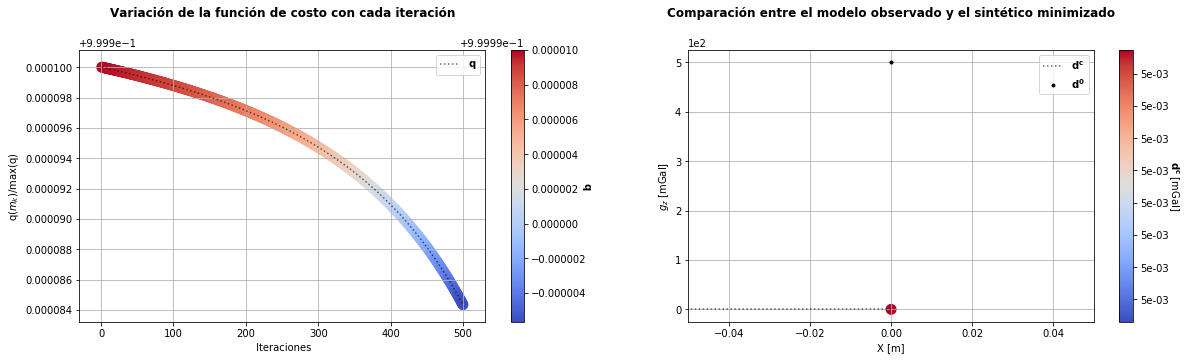

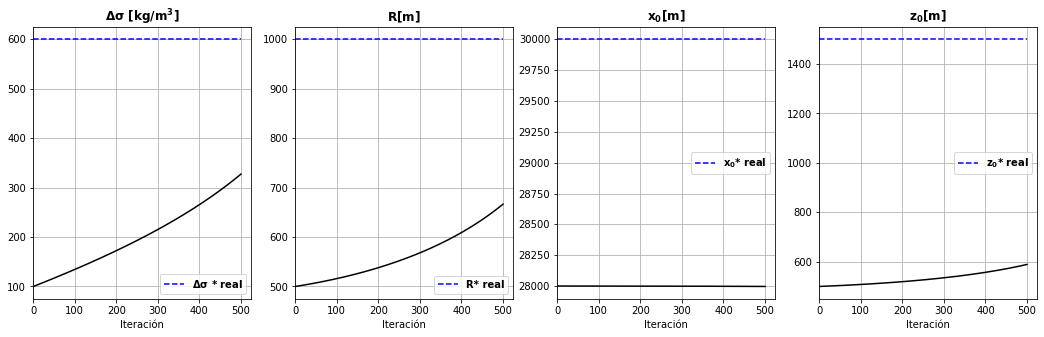


Los valores optimizados son:
D_Sigma [kg m-3]    R[m]    X_0 [m]     Z_0 [m]
    328.125       667.220   27996.517   589.494


Estadísticos de los datos:

Datos sintéticos optimizados en   [mGal] : 
 Media: 4.583e-03 
 Mínimo: 4.583e-03 
 Máximo: 4.583e-03

Datos observados en   [mGal] : 
 Media: 2.499e+02 
 Mínimo: -1.208e-01 
 Máximo: 5.000e+02

La norma del gradiente para cada parámetro es: [-0.00699621 -0.0068736   0.00016357 -0.00388506]



In [10]:
data= np.loadtxt("http://carina.fcaglp.unlp.edu.ar/~jgomez/academic/mpp/data/grav-cilindro2D-invertir.txt")
X= np.array(data[:,0]) 
g=np.array(data[:,1])

#Parámetros iniciales: sigma[kg/m3] ,R[m], X0[m], Z0[m] 
m00=[ 100 ,   500 , 28000 , 500]      #Definimos los parámetros iniciales
unid=" [mGal]"                        #Definimos la unidad con la que vamos a trabajar
Niter=500                             #Fijamos el número de iteraciones    
eps=1e2

gg=g
#Llamamos a la función para aplicar el algoritmo
y = steepest_gradient_cilindro_gravimetrico(gg , X,  m00 , eps, Niter , unid)

<div align="justify">

<br> Notamos que al aplicar el método utilizando unidades de miligales, los valores obtenidos del gradiente fueron del orden de los $10^{-6}$, de modo que al buscar el $\epsilon>0$ tal que el método pudiera converger a una solución adecuada, obtuvimos que $\epsilon=100$, el cual permite que la función de costo tenga un comportamiento decreciente acorde a lo esperado al utilizar un valor del parámetro de aprendizaje contenido dentro del rango óptimo, es decir, se asemeja a lo mostrado anteriormente. Luego, el $\epsilon$ final se aleja del rango establecido por tan solo dos órdenes de magnitud, lo cual no difiere tanto de los valores de referencia.</br></div>

<div align="justify">

<h2> Resultados del algoritmo utilizando unidades de $m/s^2$ </h2>    

<br>Procederemos a generar varios gráficos:</br>   
<ul style= "list-style-type: square">

<br>
<li>Variación de la función de costo con cada iteración.</li>
<li>Variación de los distintos parámetros con cada iteración.</li>
<li>Comparación entre el modelo observado y el sintético minimizado.</li>
</br>


</ul>
</div>


Número de iteraciones: 500
Vector de parámetros:
D_Sigma [kg m-3]    R[m]    X_0 [m]     Z_0 [m]
    100.000       500.000   28000.000   500.000



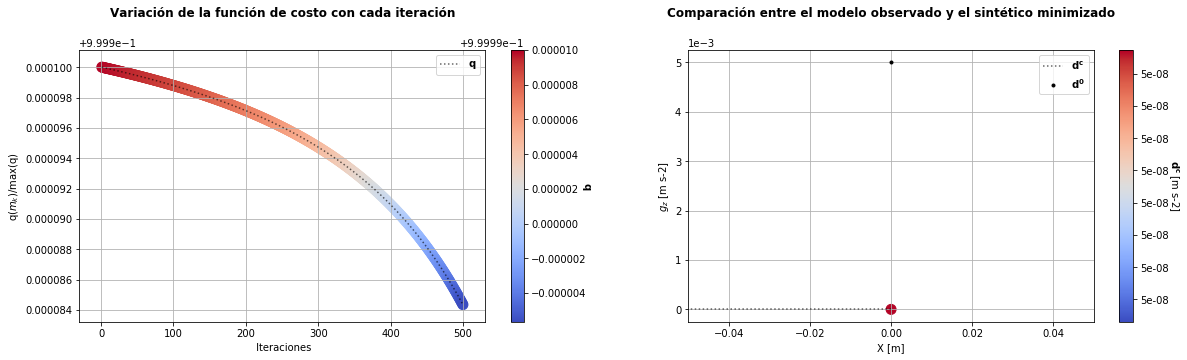

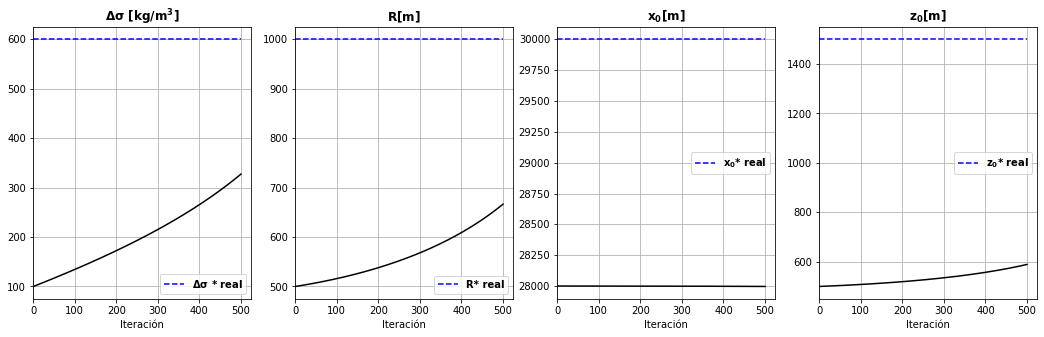


Los valores optimizados son:
D_Sigma [kg m-3]    R[m]    X_0 [m]     Z_0 [m]
    328.125       667.220   27996.517   589.494


Estadísticos de los datos:

Datos sintéticos optimizados en   [m s-2] : 
 Media: 4.583e-08 
 Mínimo: 4.583e-08 
 Máximo: 4.583e-08

Datos observados en   [m s-2] : 
 Media: 2.499e-03 
 Mínimo: -1.208e-06 
 Máximo: 5.000e-03

La norma del gradiente para cada parámetro es: [-6.99620696e-13 -6.87360460e-13  1.63572064e-14 -3.88506457e-13]



In [11]:
del gg , eps , m00, G ,Niter
#Parámetros iniciales:  sigma[kg/m3], R[m],  X0[m],  Z0[m] 
m00=[ 100 , 500 , 28000 , 500]                   #Definimos los parámetros iniciales
unid=" [m s-2]"
Niter=500                                        #Fijamos el número de iteraciones    
eps=1e12                                         #Fijo el valor del parámetro de aprendizaje
                                                 #Para valores de eps>1E12 se obtiene una indeterminación     
gg=np.array(data[:,1])
gg*=1e-5                                         #llevo mGal -> m s-2

#Llamamos a la función para aplicar el algoritmo
y = steepest_gradient_cilindro_gravimetrico(gg , X,  m00 , eps, Niter , unid )

<div align="justify">

<br> Notamos que al aplicar el método utilizando unidades de $m/s^2$, los valores obtenidos del gradiente fueron del orden de los $10^{-16}$, de modo que al buscar el $\epsilon>0$ tal que el método pueda converger a una solución, obtuvimos que $\epsilon=10^{12}$ (es decir, diez órdenes de magnitud mayor al caso anterior), lo cual no coincide con lo esperado según la teoría, ya que se trata de un número muy grande que podría generar problemas numéricos para el caso de optimizar otras funciones más complejas. Sin embargo, al trabajar con estas unidades, dicho valor del parámeto de aprendizaje es el que hace mínima la función de costo y permite obtener nuevamente el comportamiento esperado de la misma.  </br>
</div>


<h3>Observaciones</h3>   
    
<div align="justify">  
 
   <br> Vemos que el dato sintético obtenido luego de aplicar el algoritmo se aproxima bastante a los datos observados en ambos casos. Además notamos que algunos parámetros convergieron antes que otros, siendo $\Delta\sigma$ el que  converge más rapido y $ z_0 $ el más lento. Finalmente, podemos apreciar que los estadísticos tanto para el dato sintético optimizado como para el dato observado, son muy similares entre sí, lo cual coincide con lo esperado.</br> 
 

 
 
</div>

<h3>Aplicación del algoritmo para funciones de una sola variable</h3>   
    
<div align="justify">  
 
   <br> A continuación, aplicaremos el mismo método anterior pero con la diferencia de trabajar con una función de una única variable.</br> 
 

 
 
</div>

In [ ]:
#Método de gradient-descent para funciones de una sola variable

#Para este algoritmo iterativo utilizamos una función  cualquiera y su derivada:

def f(x):
    return 0.5*x**4-x**3    #Genero la función a minimizar 

def f_prima(x):           #Calculo la derivada de la función
    return 2*x**3-3*x**2 

#Esta metodología no fija el número de iteraciones previamente, se trabaja con un valor de tolerancia prefijada
#por el usuario, a partir del cual tenemos el número máximo de iteraciones hasta que se deje de cumplir la tolerancia.

#Valores iniciales
x_n1 =  2 
x_n2 = -1
eps =0.1                        #Parámetro de aprendizaje

def gradient_dc (x_n,eps):             #Función del método
  q0=0.5*np.abs(f(1.5)-f(x_n))
  x_list, y_list ,q= [x_n], [f(x_n)],[q0]     #Creo listas para almacenar los valores
  x_o,e,calc=0,0,0                     #Inicializo valores
  tol = 1e-4                           #Tolerancia del método
  while abs(x_n - x_o) > tol:          #Evalúo la tolerancia
        x_o = x_n
        x_n = x_o - eps*f_prima(x_o)   #Expresión recursiva del método
        x_list.append(x_n)
        y_list.append(f(x_n))
        e=(f(1.5)-f(x_n))   #Vector de errores
        calc=0.5*np.abs(e)
        q.append(calc)      #Función de costo

  return x_n, x_list, y_list,q

x=np.linspace(-1.5,2.5,100)
y=f(x)
x_n11,X1,Y1,q1=gradient_dc(x_n1,eps)
x_n22,X2,Y2,q2=gradient_dc(x_n2,eps)
q1=q1/np.max(q1)
q2=q2/np.max(q2)

print()
print('Resultados del método:')
print()
print("Mínimo para x =", x_n1,': f(x)=',f(x_n11), 'x_min=',x_n11)
print("Número de iteraciones máximas:", len(q1))
print()
print("Mínimo para x =", x_n2,': f(x)=',f(x_n22),'x_min=',x_n22)
print("Número de iteraciones máximas:", len(q2))

In [ ]:
#Funciones de costo para cada caso
plt.figure(1,figsize=(18,5))
iter=np.linspace(0,len(q1),len(q1))

plt.scatter(iter,q1,c='k')
plt.plot(iter,q1,c="r")
plt.xlim(np.min(iter),np.max(iter))
plt.xlabel("Iteraciones")
plt.ylabel("$q(x)/q(x)_{max}$")
plt.title("Algoritmo de minimización para x=2",fontweight='bold')
plt.show()

plt.figure(2,figsize=(18,5))
iter=np.linspace(0,len(q2),len(q2))
plt.scatter(iter,q2,c='k')
plt.plot(iter,q2,c="r")
plt.xlim(np.min(iter),np.max(iter))
plt.xlabel("Iteraciones")
plt.ylabel("$q(x)/q(x)_{max}$")
plt.title("Algoritmo de minimización para x=-1",fontweight='bold')
plt.show()

#Gráficos particulares

X, Y = np.meshgrid(x, x)
zi = griddata((x, x), y, (x[None,:], x[:,None]), method='nearest')
legend_properties = {'weight':'bold'}
fig = plt.figure(figsize=(20, 10))

#---------------------------------Caso x=2-------------------------------------#

###### GRÁFICO 1D #########
ax = fig.add_subplot(2, 3, 1)
ax.plot(x,y,'k-')
ax.scatter(X1,Y1,c='k')
ax.plot(X1,Y1,c='k')
ax.plot(x_n11,f(x_n11),'r.',label="x0*",marker="x",markersize=15)
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.legend(prop=legend_properties)

###### GRÁFICO 2D #########
ax = fig.add_subplot(2, 3, 2)
map=ax.contourf(x, x, zi,100, cmap='coolwarm')
ax.scatter(X1,Y1,c='k')
ax.plot(X1,Y1,c='r')
ax.plot(x_n11,f(x_n11),'r.',label="x0*",marker="x",markersize=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(prop=legend_properties)
fig.colorbar(map,shrink=0.5, aspect=15,pad=0.05).set_label('z',labelpad=10, y=0.5, rotation=270)

##### GRÁFICO 3D #######
ax = fig.add_subplot(2, 3, 3, projection='3d')
surf=ax.plot_surface(X, Y, zi, rstride=1, cstride=1,alpha=0.2, cmap='coolwarm', linewidth=0, antialiased=False)
ax.scatter(X1,Y1,c='k')
ax.plot(X1,Y1,c='r')
ax.plot([x_n11], [f(x_n11)], [0.], 'r.',label="x0*",marker="x",markersize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zticks([])  #Asi desactivo los valores del eje z
ax.legend(prop=legend_properties)
ax.view_init(45,25)
fig.colorbar(surf,shrink=0.5, aspect=15,pad=-0.04).set_label('z',labelpad=10, y=0.5, rotation=270)

#---------------------------------Caso x=-1-------------------------------------#

###### GRÁFICO 1D ########
ax = fig.add_subplot(2, 3, 4)
ax.plot(x,y,'k-')
ax.scatter(X2,Y2,c='k')
ax.plot(X2,Y2,c='k')
ax.plot(x_n22,f(x_n22),'r.',label="x0*",marker="x",markersize=15)
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.legend(prop=legend_properties)

###### GRÁFICO 2D #########
ax = fig.add_subplot(2, 3, 5)
map=ax.contourf(x, x, zi,100, cmap='coolwarm')
ax.scatter(X2,Y2,c='k')
ax.plot(X2,Y2,c='r')
ax.plot(x_n22,f(x_n22),'r.',label="x0*",marker="x",markersize=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(prop=legend_properties)
fig.colorbar(map,shrink=0.5, aspect=15,pad=0.05).set_label('z',labelpad=10, y=0.5, rotation=270)

##### GRÁFICO 3D #######
ax = fig.add_subplot(2, 3, 6, projection='3d')
surf=ax.plot_surface(X, Y, zi, rstride=1, cstride=1,alpha=0.2, cmap='coolwarm', linewidth=0, antialiased=False)
ax.scatter(X2,Y2,c='k')
ax.plot(X2,Y2,c='r')
ax.plot([x_n22], [f(x_n22)], [0.], 'r.',label="x0*",marker="x",markersize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zticks([])  #Asi desactivo los valores del eje z
ax.legend(prop=legend_properties)
ax.view_init(60,45)
fig.colorbar(surf,shrink=0.5, aspect=15,pad=-0.04).set_label('z',labelpad=10, y=0.5, rotation=270)
plt.figtext(0.5,0.95, "Gráfico de la función minimizada con x=2", ha="center", va="top", fontsize=14, color="k",fontweight='bold')
plt.figtext(0.5,0.5, "Gráfico de la función minimizada con x=-1", ha="center", va="top", fontsize=14, color="k",fontweight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.show()

<div align="justify"> 

<br> En este caso notamos que, al tratarse de una función sencilla cuya única particularidad yace en el hecho de que presenta alrededor de $x=-2$ y $x=2$ un mínimo local así como el mínimo global buscado, el método tendrá dificultades para llegar a la solución correcta dependiendo del modelo inicial planteado, es decir, cuando partimos de $x_0=2$, el método alcanzará el resultado correcto ya que se ecuentra más cercano al mínimo global que al local, mientras que al plantear $x_0=-1$, el método además de iterar una mayor cantidad de veces con el fin de cumplir con la toleracia establecida, no logra encontrar el mínimo esperado, sino que en cambio converge al mínimo local, demostrándose así la importancia de plantear una aproximación inicial adecuada al trabajar con este método, lo cual requiere conocer de antemano el comportamiento de la función de estudio. </br>

<br> Otra observación importante yace en el hecho de que el valor de $\epsilon$ utilizado se encuentra dentro del rango de referencia, además, gracias a la correcta selección del mismo, el algoritmo se comporta de manera estable para ambos valores iniciales. </br></div>

<h2> Módulo de optimización y localización de mínimos con el paquete SciPy </h2>
    
 <div align="justify">   
<br>Una forma más práctica para aplicar los conceptos desarrollados anteriormente es utilizando el algoritmo de optimización del paquete SciPy, el cual contiene diversas funciones para resolver diferentes escenarios (minimizar o maximizar), tanto lineales como no lineales y sujetas a condiciones de borde.</br>

<br>De esta manera, con el objetivo de corroborar las soluciones obtenidas en el desarrollo anterior, podemos aplicar el modulo $ fmin\_cg$, el cual utiliza gradientes conjugados basados en las soluciones de Polak y Ribiere, para hallar la solución deseada. </br>

 
<br><h3>Anatomía de la función de optimización del paquete SciPy</h3></br>

<br>La función de minimización tiene la siguiente forma:</br>

<br>
\begin{align}
\boldsymbol{scipy.optimize.fmin \_ cg}(f\,, \,m_0\,, f', args=(), ...)
\end{align}
</br>

<br>Esta función necesita varios argumentos de entrada, dentro de los cuales los más importantes son:</br>


<ul style= "list-style-type: square">
  
<li>La función objetivo, como primer argumento, esta debe ser una función escalar.</li>
<li> Los valores iniciales, como segundo argumento, los cuales deben ser un arreglo unidimensional  o en caso de funciones de una única variable se tratará de un escalar.</li>
<li> Especificación del gradiente de la función (Argumento opcional: podemos proporcionar una función que calcule el gradiente de la función como un arreglo unidimensional, de lo contrario el gradiente de la misma será aproximado por medio del método de diferencias finitas). </li>
</ul>

Otros argumentos pueden ser: argumentos adicionales para la función y su gradiente, paso del algoritmo, tolerancia, número de iteraciones máximas, entre otros.</br>

<h3>Requerimientos para el uso de la función:</h3></br>

Para utilizar el módulo $fmin \_ cg$ del paquete mencionado anteriormente, necesitamos que la función a minimizar cumpla con ciertas condiciones para el correcto cálculo del mínimo:</br>

<ul style= "list-style-type: square">

<li>La función $f$ a minimizar debe tener un único punto mínimo global, no debe contener puntos mínimos locales ni puntos estacionarios. </li>
<li>La función $f$ puede aproximarse de manera razonable y localmente por una función cuadrática de las variables en juego.</li>
<li>La función debe ser continua y tener un gradiente continuo.</li>
<li>El gradiente de la función $f'$ no debe ser muy grande y debe tener una norma menor a un valor de 1000.</li>
<li>El valor inicial $m_0$ o vector de parámetros iniciales $\mathbf{m_0}$ debe ser razonablemente cercano al punto mínimo de la función, de lo contrario no podrá converger exitosamente. </li>

</ul>    
    
Con todos los requerimientos anteriormente expuestos, procedemos a aplicar el algoritmo a dos casos particulares: una función explícita y la función de costo para el método de inversión gravimétrico planteado en bloques anteriores.</br>

</div>

<h2>Aplicación del módulo de optimización del paquete SciPy </h2>

 <div align="justify"> 
 <br> Procederemos a generar unos nuevos resultados de nuestro vector $"\mathbf{m}"$ final, por medio de una aproximación del gradiente de la función con diferencias finitas, y posteriormente utilizando el gradiente explícito de la misma, con el objetivo de comparar los resultados previamente obtenidos con los arrojados por este paquete. En ambos casos partiremos de un vector $\mathbf{m_0}$ diferente para además comparar cómo se comporta el método al partir de una solución inicial más cercana o lejana a la solución verdadera. </br>
</div>

<br><h3> Utilizando el método de diferencias finitas: </h3></br>

In [ ]:
#Función de costo
data = np.loadtxt('http://carina.fcaglp.unlp.edu.ar/~jgomez/academic/mpp/data/grav-cilindro2D-invertir.txt').T
X,d0= data[:,0],data[:,1]  # columnas del dato en cada vector (x,anomalía)

#Se deben dejar en miligales

x=np.asarray(X)
d0=np.asarray(d0)

#### MATRIZ DEL MODELO ####
def gz_cilindro(X,m):
  #Constante de gravitación universal
  G=6.67408e-11     # m3 kg-1 s-2
  ctte= 2 * np.pi * G 
  gz=np.zeros(len(X))
  for i in range (len(X)):
    gz[i]= (ctte* m[0] * (m[1]**2) * m[3] )/ ((X[i] - m[2])**2 + m[3]**2)
  return gz

def cost(m,d0,x):
  #Constantes
  G=6.67408e-11    #m3 kg-1 s-2
  ctte= 2 * np.pi * G *1e5 #(multiplico por el factor 1e5 para pasarlos a mGal)
  dc=np.zeros(len(x))
  for i in range (len(x)):
    dc[i]= (ctte* m[0] * (m[1]**2) * m[3] )/ ((x[i] - m[2])**2 + m[3]**2) # la anomalía está en mGal
  dc=np.array(dc)
  e=d0-dc          #Vector de errores
  return e.T@e*0.5

acum = []
q=[]
def callback(mk):  #Función para acumular los resultados de cada iteración
    acum.append(mk)
    fobj=cost(mk,d0,x)
    q.append(fobj)

#Primero  aproximamos la función por medio de diferencias finitas, por ello colocamos fprime= None,
#ya que no asignamos una función que calcule derivadas parciales de la función de costo
m0 = np.array([470, 500 , 28000, 500])   #Vector de parámetros iniciales

print('Resultados:')
print()
print('SciPy')
m = optimize.fmin_cg(cost,m0,fprime= None,args=(d0,x),callback=callback)   #Cálculo de los parámetros aproximados
print()
print('Vector de parámetros iniciales  :',m0)
print('Vector de parámetros aproximados:',m)

param=np.asarray(acum)

#Generaremos los datos sintéticos utilizando los parámetros obtenidos:
dc_fin=gz_cilindro(x,m)*1E5

<h3>Gráficos resultantes luego de aplicar el algoritmo con diferencias finitas </h3>

<br> Generaremos el mismo set de gráficos mostrados en la sección del algoritmo inicial.</br>

In [ ]:
########Varación de la función de Costo en cada iteración #########

k=np.linspace(1,len(param),len(param))

plt.figure(4,figsize=(18,5))
plt.plot(k,q/np.max(q),color="k",ls=":",alpha=0.6,label="$\mathbf{q}$")
plt.scatter(k,q/np.max(q),s=100,c=q/np.max(q),cmap="coolwarm",linewidth=1,marker="o")
plt.colorbar(orientation='vertical',shrink=1).set_label("$\mathbf{q}$", labelpad=10, y=0.5, rotation=270)
plt.xlabel("Iteraciones")
plt.ylabel("q($m_k$)/max(q)")
plt.xlim([0, k.max()+k.max()*0.05])
plt.title("Variación de la función de costo con cada iteración utilizando diferencias finitas",fontweight='bold')
plt.show()

########Gráfico comparativo entre el modelo optimizado y el observado ######

plt.figure(5,figsize=(18,5))
#plt.plot(X,dc_fin,'k-',label="$\mathbf{d^c}$")
plt.plot(X,dc_fin,color="k",ls=":",alpha=0.6,label="$\mathbf{d^c}$")
plt.scatter(X,dc_fin,s=100,c=dc_fin,cmap="coolwarm",linewidth=1,marker="o")
plt.colorbar(orientation='vertical',shrink=1).set_label("$\mathbf{d^c}$ [mGal]", labelpad=12, y=0.5, rotation=270)
plt.plot(X,d0,'k.',label="$\mathbf{d^0}$")
plt.legend()
plt.xlabel("X [m]")
plt.ylabel("$g_z [mGal]$")
plt.xlim([0, X.max()])
plt.title("Comparación entre el modelo observado y el sintético minimizado utilizando diferencias finitas",fontweight='bold')
plt.show()

########Gráfico de la variación de cada parámetro con cada iteración ###########

names=[r'$\mathbf{\Delta\sigma}$ $\mathbf{[kg/m^3]}$','$\mathbf{R[m]}$','$\mathbf{x_0 [m]}$','$\mathbf{z_0 [m]}$']
dat=[param[:,0],param[:,1],param[:,2],param[:,3]]
linea_y=[np.ones(len(param))*600,np.ones(len(param))*1000,np.ones(len(param))*30000,np.ones(len(param))*1500]
label=[r"$\mathbf{\Delta \sigma}$ * real","R* real","$\mathbf{x_0}$* real","$\mathbf{z_0}$* real"] 
legend_properties = {'weight':'bold'} #sirve para colocar el texto que no esté en formato latex en formato "bold"

fig, axes = plt.subplots(1, 4, figsize=(18,5))

fig.subplots_adjust(hspace=0.3, wspace=0.35)

for ax,names,dat,linea_y,label in zip(axes.flat,names,dat,linea_y,label):
    ax.plot(k,dat,'k-')
    ax.plot(k,linea_y,'b--',label=label)
    ax.set_xlabel("Iteración")
    ax.set_title(names,fontweight='bold')
    ax.set_xlim([0, k.max()+k.max()*0.05])
    ax.legend(prop=legend_properties)
    fig.suptitle("Variación de cada parámetro con cada iteración utilizando diferencias finitas",fontweight='bold')
plt.show()

<div align="justify"> 
<br> Notamos que en este caso el resultado de la optimización, para ajustar los parámetros que mejor definen la anomalía generada por un cilindro horizontal, calculada por el paquete SciPy, llegó a una solución buena con $26$ iteraciones, lo cual representa un valor mucho menor al caso del algoritmo generado con anterioridad, el cual requirió de un mínimo de $300$ iteraciones para alcanzar resultados óptimos. </br>

<br> Notamos entonces que a pesar de aplicar otra metodología de optimización de los datos, se obtienen resultados equivalentes a los generados por el algoritmo anterior.</div>

<h3>Utilizando el gradiente explícito: </h3>

In [ ]:
#Generamos las nuevas funciones de manera de asegurar que estemos trabajando con los datos en miligales
#para evitar problemas numéricos al utilizar el paquete de SciPy.

#Ahora defino lo mismo anterior pero considerando el Jacobiano:

###################### MATRIZ  JACOBIANA ###########################

def jacob(m,x):
    G=6.67408e-11  #m^3/kg.s^2  #Constante de gravitación universal
    fac=2 * np.pi *G *1e5       #Factor constante
    A=np.array([fac * m[1]**2 * m[3] / ( (x-m[2])**2 + m[3]**2 ),
              2* fac * m[0]* m[1] * m[3] / ( (x-m[2])**2 + m[3]**2 ), 
              2* fac * m[0]* m[1]**2 * m[3]*(x-m[2]) / (( (x-m[2])**2 + m[3]**2 )**2),
             fac * m[0]* m[1]**2 * ( (x-m[2])**2 - m[3]**2  ) / (( (x-m[2])**2 + m[3]**2 )**2)]).T
    return A

############### Gradiente de la función de costo ##################

def grad_cost (m,d0,x):
  G=6.67408e-11  #m^3/kg.s^2
  ctte= 2 * np.pi * G *1e5 #multiplico por el factor 1e5 para pasarlos a mGal
  dc=np.zeros(len(x))
  for i in range (len(x)):
    dc[i]= (ctte* m[0] * (m[1]**2) * m[3] )/ ((x[i] - m[2])**2 + m[3]**2) #En mGal

  N=len(d0)                #Dimensión del dato observado
  e=np.zeros(N)
  for i in range (N):
      e[i] = d0[i]-dc[i]   #Vector de errores
  
  A=jacob(m,x)
  #Defino grad_q
  grad_q= -A.T@e           #Esto da un vector de M componentes (en este caso 4 componentes)
  return grad_q            #Tiene que ser un vector, si llegase a ser matriz entonces tenemos que hacer flatten para
                           #convertirla en un arreglo de 1D


#Ahora utilizamos el gradiente de la función para poder hallar el resultado de la optimización de gradiente descendiente

m0 = np.array([100, 500 , 28000, 500]).T  #Vector de parámetros iniciales
acum=[]
q=[]

print('Resultados:')
print()
print('SciPy')
m = optimize.fmin_cg(cost,m0, fprime= grad_cost, args=(d0,x),callback=callback)  #Cálculo de los parámetros aproximados
print()
print('Vector de parámetros iniciales  :',m0)
print('Vector de parámetros aproximados:',m)

param=np.asarray(acum)

#Generaremos los datos sintéticos utilizando los parámetros obtenidos:
dc_grad=gz_cilindro(X,m)*1E5  #multiplico por el factor 1e5 para pasarlos a mGal

<h3>Gráficos resultantes luego de aplicar el algoritmo con el gradiente </h3>

In [ ]:
########Varación de la función de costo en cada iteración #########
k=np.linspace(1,len(param),len(param))

plt.figure(6,figsize=(18,5))
plt.plot(k,q/np.max(q),color="k",ls=":",alpha=0.6,label="$\mathbf{q}$")
plt.scatter(k,q/np.max(q),s=100,c=q/np.max(q),cmap="coolwarm",linewidth=1,marker="o")
plt.colorbar(orientation='vertical',shrink=1).set_label("$\mathbf{q}$", labelpad=10, y=0.5, rotation=270)
plt.xlabel("Iteraciones")
plt.ylabel("q($m_k$)/max(q)")
plt.xlim([0, k.max()+k.max()*0.05])
plt.title("Variación de la función de costo con cada iteración utilizando el gradiente de la función",fontweight='bold')
plt.show()

########Gráfico comparativo entre el modelo optimizado y el observado ######
plt.figure(7,figsize=(18,5))
plt.plot(X,dc_fin,color="k",ls=":",alpha=0.6,label="$\mathbf{d^c}$")
plt.scatter(X,dc_fin,s=100,c=dc_fin,cmap="coolwarm",linewidth=1,marker="o")
plt.colorbar(orientation='vertical',shrink=1).set_label("$\mathbf{d^c}$", labelpad=12, y=0.5, rotation=270)
plt.plot(X,d0,'k.',label="$\mathbf{d^0}$")
plt.legend()
plt.xlabel("X [m]")
plt.ylabel("$g_z [mGal]$")
plt.xlim([0, X.max()])
plt.title("Comparación entre el modelo observado y el sintético minimizado utilizando el gradiente de la función",fontweight='bold')
plt.show()

########Gráfico  de la variación de cada parámetro con cada iteración ###########

names=[r'$\mathbf{\Delta\sigma}$ $\mathbf{[kg/m^3]}$','$\mathbf{R[m]}$','$\mathbf{x_0 [m]}$','$\mathbf{z_0 [m]}$']
dat=[param[:,0],param[:,1],param[:,2],param[:,3]]
linea_y=[np.ones(len(param))*600,np.ones(len(param))*1000,np.ones(len(param))*30000,np.ones(len(param))*1500]
label=[r"$\mathbf{\Delta \sigma}$ * real","R* real","$\mathbf{x_0}$* real","$\mathbf{z_0}$* real"] 
legend_properties = {'weight':'bold'} #sirve para colocar el texto que no esté en formato latex en negrita

fig, axes = plt.subplots(1, 4, figsize=(18,5))

fig.subplots_adjust(hspace=0.3, wspace=0.35)

for ax,names,dat,linea_y,label in zip(axes.flat,names,dat,linea_y,label):
    ax.plot(k,dat,'k-')
    ax.plot(k,linea_y,'b--',label=label)
    ax.set_xlabel("Iteración")
    ax.set_title(names,fontweight='bold')
    ax.legend(prop=legend_properties)
    ax.set_xlim([0, k.max()+k.max()*0.05])
    fig.suptitle("Variación de cada parámetro con cada iteración utilizando el gradiente de la función",fontweight='bold')
plt.show()

<div align="justify"> 
<br> Notamos que en este caso el resultado de la optimización llegó a una solución adecuada para el caso de los parámetros $x_0$ y $z_0$, y no tanto para $\Delta\sigma$ y $R$,esto debido a que los parámetros iniciales escogidos se encontraban más alejados de la solución real, a diferencia del caso anterior donde el $\mathbf{m_0}$ era más próximo a la misma y $\Delta\sigma$ y $R$ eran más parecidos a los valores esperados. Obteniendo así un número de iteraciones finales igual a $24$, cuyo valor sigue siendo mucho menor al caso del algoritmo generado con anterioridad y tan solo un poco menor al caso anterior. </br>

<br>Recordando la expresión con la cual se calcula la anomalía generada por un cilindro horizontal:</br>

<br>
\begin{align}
f(x;Δσ,R,x_0,z_0)≡g_z(x;Δσ,R,x_0,z_0)=2πGΔσR^2\dfrac{z_0}{(x−x_0)^2+z_0^2}\,\,
\end{align}
</br>

<br>Notamos que en este caso los parámetros $Δσ$ y $R$ ambos están multiplicando a la función modelada, y que en el caso arriba mostrado, a pesar de que los valores obtenidos luego de la optimización realizada no son exactos, se compensan entre sí, es decir, el valor de $Δσ$ final sobreestima el valor real, mientras que el valor de $R$ lo subestima, generando al final la misma respuesta gravimétrica que haría la mejor combinación (más exacta) de los parámetros reales, lo cual tiene que ver nuevamente con el problema de la inmensidad de soluciones que pueden generar la misma anomalía (ambigüedad del método). De esta manera hemos explicado entonces cómo se logró obtener un resultado equivalente al obtenido utilizando diferencias finitas (curva del modelo obtenido) utilizando un vector de parámetros inadecuado.</br>
 
</div>

<h2>Otro ejemplo de la aplicación del paquete de SciPy</h2>
<div align="justify"> 
<br> A continuación procederemos a aplicar nuevamente el paquete de SciPy para obtener el mínimo de una función de una sola variable, la cual ya fue optimizada con anterioridad.</br></div>

In [ ]:
#Este programa sirve para optimizar la función: 1/2 x^4 - x^3, partiendo de dos posiciones iniciales:
#x0= 2
#x0=-1

def f(x, *args):
    a,b = args
    return a*x**4-b*x**3

def gradf(x, *args):
    a,b = args
    gu = 4*a*x**3 - 3*b*x**2     #Gradiente de la componente "x"
    return np.asarray(gu)

x0 = 2  #Valor inicial 1
x2=-1   #valor inicial 2

a=0.5
b=1
args=(a,b)  # Valores de los parámetros
x=np.linspace(-1.5,3,100)
y=f(x,*args)

#Gráfico de la función
plt.figure(1, figsize=(18,5))
plt.plot(x,y,'k-*')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de la función a minimizar",fontweight='bold')
plt.show()

print('Resultados:')
print()
res1 = optimize.fmin_cg(f, x0, fprime=gradf, args=args,maxiter=10)
res2 = optimize.fmin_cg(f, x0=x2, fprime=gradf, args=args,maxiter=10)

print()
print("El resultado utilizando como valor inicial", str(x0),"fue:", res1 ) 
print()
print("El resultado utilizando como valor inicial", str(x2),"fue:", res2) 


In [ ]:
## GRÁFICOS GENERALES ##

X, Y = np.meshgrid(x, x)
zi = griddata((x, x), y, (x[None,:], x[:,None]), method='nearest')
y_cruz=f(res1,*args)
legend_properties = {'weight':'bold'}
fig = plt.figure(figsize=(20, 10))

###### GRÁFICO 1 D #######

ax = fig.add_subplot(2, 3, 1)
ax.plot(x,y,'k-')
ax.plot(res1,y_cruz,'r.',label="x0*",marker="x",markersize=10)
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.legend(prop=legend_properties)

###### GRÁFICO 2D #########

ax = fig.add_subplot(2, 3, 2)
map=ax.contourf(x, x, zi,100, cmap='coolwarm')
ax.plot(res1,y_cruz,'r.',label="x0*",marker="x",markersize=10)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(prop=legend_properties)
fig.colorbar(map,shrink=0.5, aspect=15,pad=0.05).set_label('z',labelpad=10, y=0.5, rotation=270)

##### GRÁFICO 3D #######

ax = fig.add_subplot(2, 3, 3, projection='3d')
surf=ax.plot_surface(X, Y, zi, rstride=1, cstride=1,alpha=0.2, cmap='coolwarm', linewidth=0, antialiased=False)
ax.plot(res1,y_cruz,'r.',label="x0*",marker="x",markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(prop=legend_properties)
ax.set_zticks([])  #Asi desactivo los valores del eje z
fig.colorbar(surf,shrink=0.5, aspect=15,pad=-0.04).set_label('z',labelpad=10, y=0.5, rotation=270)

fig.suptitle('Gráficos de la función minimizada',fontweight='bold')
plt.subplots_adjust(hspace=0, wspace=0.25)
plt.show()

<div align="justify"> 
<br> Notamos que la diferencia al partir de $x_0=2$ o $x_0=-1$ es el número de iteraciones que requirió el método para encontrar el valor adecuado. Además el paquete logró encontrar el mínimo global buscado sin problemas a pesar de partir de un valor inicial más alejado. </br>

</div>


<h2>Cálculo de errores porcentuales</h2>
<div align="justify"> 
<br> A continuación procederemos a calcular los errores porcentuales de cada resultado obtenido, tanto para la aplicación del algoritmo desarrollado (observaciones gravimétricas y función de una única variable) como la minimización mediante el paquete de SciPy.</br></div>

In [ ]:
#Definiremos una función para el cálculo aproximado de los errores porcentuales para cualquier
#resultado obtenido

def porcentaje(ValorObservado, ValorReal):
    return 100 * np.abs((ValorReal - ValorObservado)/(ValorReal) )

#Donde:
#ValorObservado hace referencia al valor actual calculado mediante alguna rutina
#ValorReal hace referencia al valor teórico conocido

####################################################################################################

#Errores del algoritmo calculado en miligales 
#Contraste densidad[kg m-3]    R[m]                  X_0 [m]              Z_0 [m] 
m_nuestra_mGal=  [617.703817180938,990.7756513209807,29987.86442963579,1499.7502292477393]
m_nuestra_mGal=np.asarray(m_nuestra_mGal)


#Errores del algoritmo calculado en m s-2
#Contraste densidad[kg m-3]    R[m]                  X_0 [m]              Z_0 [m] 
m_n_ms= [ 617.7038171809378 , 990.775651320981, 29987.86442963579 ,1499.7502292477395] 
m_n_ms=np.asarray(m_n_ms)

#Vector de parámetros aproximados mediante el paquete SciPy utilizando diferencias finitas: 
m_sci_dif_fin =  [ 630.79336469, 980.41697743,29987.8584174 , 1499.60277126]
m_sci_dif_fin = np.asarray(m_sci_dif_fin)


#Vector de parámetros aproximados  mediante el paquete SciPy utilizando el gradiente de la función: 
m_sci_grad_expl= [ 1254.75209588 , 695.14100593 , 29987.86268913 , 1499.56450176]
m_sci_grad_expl= np.asarray(m_sci_grad_expl)


#Parámetros reales
m_Real=  [600,1000,30000,1500]
m_Real= np.asarray(m_Real)


print("Resumen de errores porcentuales:")
print()
print("Observaciones gravimétricas")
print()
print( "El error cometido al partir de cada valor inicial indicado fue:")
print()    
print( "                 [ Error_D_Sigma  Error_R    Error_X_0   Error_Z_0  ]")
print( " Resultados en mGal :" , porcentaje( m_nuestra_mGal ,m_Real ),"[%]")
print( " Resultados en ms-2 :" , porcentaje( m_n_ms ,m_Real ) ,"[%]")
print( " SciPy dif. finit.  :" , porcentaje( m_sci_dif_fin ,m_Real ) ,"[%]")
print( " SciPy grad. expl.  :" , porcentaje( m_sci_grad_expl ,m_Real ) ,"[%]")
print()
#################################################################################################

#Mínimo para x = -1 : f(x)

f_x_1= -0.018015734428209904 

#Mínimo para x = 2 : (f,x) 
f_x_2 =  1.5001100194441441

real=  1.5 

print()
print("Función de una única variable")
print()
print( "El error cometido al partir de cada valor inicial indicado fue:" )
print()   
print( " x=-1:" , porcentaje( f_x_1,real ),"[%]" )
print( " x=2:" , porcentaje( f_x_2,real ) ,"[%]")

<h2>Conclusiones generales </h2>

<h3>Algoritmo de optimización </h3>
<div align="justify">
<br><ul style= "list-style-type: square">
<br><li>Siempre antes de decidir aplicar el método, se debe evaluar con qué tipo de función estamos trabajando, para determinar si este va a poder converger a la solución adecuada o no.</li></br>

<br><li>El número de iteraciones necesarias para que el método pueda converger va a depender de qué tan próximo del mínimo de la función se encuentren los parámetros que definen el modelo inicial, resultando en un tiempo mayor de ejecución para aquellos valores que estén muy alejados de la solución correcta.</li></br>

<br><li>El valor de $\epsilon$ es arbitrario, es decir, se parte de un valor de referencia cualquiera, coherente con las unidades de trabajo, y luego se va ajustando hasta un valor umbral, si se sobrepasa este umbral el resultado no converge al valor deseado. En esta oportunidad el valor umbral fue de  $\epsilon= 10^{12}$ (al trabajar con los datos en $m/s^2$) y de $\epsilon= 100$ (al trabajar en miligales).Además notamos que por más que se realizara un número muy elevado de iteraciones ($3000$), si el valor de esta constante no se encontraba dentro del rango óptimo, el método no alcanzaba un resultado coherente con lo esperado.</li></br>

<br><li>Al estudiar la variación de los parámetros con cada iteración se pudo observar que la cantidad de iteraciones mínima necesaria para obtener valores coherentes es de alrededor de $300$. </li></br> 
 
<br><li>Los valores de los parámetros finales  obtenidos luego de la aplicación del algoritmo en $m/s^2$ fueron  $\Delta\sigma = 617.70[kg/m^3]$, $R=   990.78[m]$, $x_0 = 29987.86 [m]$ y  $z_0=1499.75 [m]$, cuyos errores porcentuales son del $ 2.95\% , 0.92\% , 0.04\% $ y $0.02\%$, respectivamente. Posteriormente, en el caso de trabajar en miligales, se obtuvo el mismo vector de parámetros, por lo que los errores asociados también coincidieron. Este resultado nos indica que el método se aproximó muy bien a los parámetros reales en ambos casos, a pesar de trabajar con distintas unidades y partir de un mismo vector de parámetros iniciales, es decir, se obtuvo una buena solución en ambos casos.</li></br>
</div>

<h3>Optimización mediante el paquete de SciPy </h3>

<div align="justify">
<br><ul style= "list-style-type: square">
<br><li>Cualquier paquete externo que permita ubicar máximos y mínimos puede usarse sin inconvenientes, siempre y cuando la función cumpla con los  requerimientos estipulados por la misma, de no cumplirse estos criterios, no se puede garantizar obtener una buena solución.</li></br>
 
<br><li>Al utilizar el paquete de SciPy con la función de costo a minimizar, se observó que el vector de parámetros inicial más próximo a los datos reales mostraba mejores resultados que un vector de parámetros más alejados. Esta metodología requirió de menor número de iteraciones ($24$ al utilizar diferencias finitas y $27$ al utilizar el gradiente de la función) que para el caso del algoritmo de minimización presentado anteriormente, lo que implica un menor tiempo de cálculo, para obtener resultados buenos en el primer caso e inadecuados en el segundo. Sin embargo, el algoritmo de minimización codificado en esta notebook, muestra un mejor ajuste en los parámetros que el obtenido por medio de SciPy.</li></br>

<br><li>Al utilizar el paquete de SciPy con las observaciones gravimétricas y su aproximación del gradiente por diferencias finitas, el vector de parámetros resultante es: $\Delta\sigma = 630.79[kg/m^3]$, $R=   980.42[m]$, $x_0 = 29987.86 [m]$ y  $z_0=1499.60 [m]$, cuyos errores porcentuales son del $5.13\%$,$1.96\%$, $0.04\%$ y $0.03\%$, de esta manera fuimos capaces de obtener una buena solución. Mientras que al optimizar utilizando el gradiente de la función, se obtuvo que el vector de parámetros es:$\Delta\sigma = 1254.75[kg/m^3]$, $R=   695.14[m]$, $x_0 = 29987.86 [m]$ y  $z_0=1499.56 [m]$, cuyos errores porcentuales son del $109.12\%$,$30.49\%$, $0.04\%$ y $0.03\%$. Por lo que notamos que los errores incrementan al partir de un vector de parámetros iniciales alejado de la solución real, resultando exactos en unos parámetros ($z_0$ y $x_0$) e inexactos en otros ($\Delta \sigma$ y $R$), arrojando un vector de parámetros que no se pueden considerar como buenos ya que no todos los valores quedan dentro del rango de errores definido anteriormente. </li></br>
</div>

<h3>Optimización de una función de una única variable </h3>

<div align="justify">
<br><ul style= "list-style-type: square">
<br><li> En el caso en el que se trabajó con el algoritmo de "$Steepest \  descent$" se logró obtener la solución adecuada al plantear un valor inicial cercano al mínimo global (obteniendo un error del $0.01\%$), mientras que al utilizar una aproximación inicial más lejana, y por la forma de la función, el método no pudo converger al mínimo buscado sino al mínimo local más cercano (siendo en este caso el error del $101.20\%$). Este procedimiento requirió de un número de iteraciones de $13$ y $170$, respectivamente.</li></br>

<br><li>Para el caso de la función de una sola variable, la cual se optimizó por medio del paquete SciPy, se obtuvo un mínimo de $\approx1.49$ para un valor inicial de $x_0=2$  y de $x_0=-1$. Notamos que numéricamente la diferencia se aprecia a partir del sexto decimal y que el número de iteraciones que requirió el método para encontrar el valor adecuado aumentó para el valor inicial $x_0=-1$, debido a que se encontraba más lejos de la solución real, como se mencionó antes. En este caso el procedimiento requirió de un número de iteraciones de $1$ y $2$, respectivamente, lo cual fue suficiente para obtener un resultado con un error del $6.66\times10^{-5}\%$, comprobándose que para funciones sencillas, el paquete arroja buenas aproximaciones y en un menor tiempo de cálculo que el algoritmo elaborado. </li></br>
</div>   

<div align="justify">
<h2>Referencias bibliográficas y fuentes consultadas</h2>

<br><ul style= "list-style-type: decimal">

 <li>Goodfellow, I. Courville, A. y Bengio, Y. (2016). Deep Learning.MIT Press. Chapter 4: Numerical Computation, pp 78-91. Consultado: 11/07/2020. Disponible: http://www.deeplearningbook.org.</li></br>

 <li>The SciPy Community: SciPy v1.5.1 Reference Guide: Optimization and root finding (optimize). Consultado: 08/07/2020. Disponible: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html#id1.</li></br>

 <li>SciPy lecture notes: 2. Advanced topics - 2.7 Mathematical optimization: finding minima of functions. Consultado: 09/07/2020. Disponible: https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html.</li></br>
 
 <li>Heinold, B. (2012). A Practical Introduction to Python Programming. Department of Mathematics and Computer Science, Mount St. Mary's University. </li></br>
  
 <li>Hunter, J. et al. (2019). Matplotlib: Release 3.1.1 - User's Guide. </li></br>

 <li>Numpy.org: Numpy v1.19 Manual - Routines: Linear Algebra. Consultado: 08/07/2020. Disponible: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html.</li></br>
 
 <li>Hammel, B.D.(2019). What learning rate should i use?. Consultado: 15/07/2020. Disponible: http://www.bdhammel.com/learning-rates/. </li></br>
 
 <li>Brownlee, J. (25-01-2019).Understand the Impact of Learning Rate on Neural Network Performance. Consultado: 15/07/2020. Disponible: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/. </li></br>
 
 <li>Bengio, Y. (2012). Practical Recommendations for Gradient-Based Training of Deep Architectures. Consultado: 16/07/2020. Disponible: https://arxiv.org/pdf/1206.5533.pdf. </li></br>

 <li>Jordan, J. (2018). Setting the learning rate of your neural network.Consultado: 15/07/2020. Disponible: https://www.jeremyjordan.me/nn-learning-rate/.</li></br>

 <li>Kowalski, A. S. (s.f). Técnicas auxiliares de laboratoio: I.Errores. Consultado:18/07/2020. Disponible: https://www.ugr.es/~andyk/Docencia/TEB/Errores.pdf .</li></br>

</div>